# Visualizing Map Data with Geopandas

There are several python packages that plot geographical data. In this example, we will be using [geopandas](http://geopandas.org/), because of its simplicity and its relation to `pandas`.

The data used in this example is provided by the US 2010 Census, and is hosted on the [US Census Bureau](https://www2.census.gov/) website.

### Importing Python Packages

These packages are required for the following program to run. If unavailable, you can install them via `pip install <package-name>`.

In [1]:
import requests
import matplotlib.pyplot as plt
import geopandas as gpd

### Downloading Data

This script downloads the file from `url`, saves it in the current directory, and loads the shapefile with `geopandas`.

In [2]:
url = 'http://www2.census.gov/geo/tiger/TIGER2010DP1/State_2010Census_DP1.zip'
file_name = 'State_2010Census_DP1.zip'

In [44]:
r = requests.get(url)
with open(f'{file_name}', 'wb') as f:
    f.write(r.content)

data = gpd.read_file(f"zip://{file_name}")

### Viewing Data

`data.head()` displays the first five rows of the attribute table. The column names can be a bit criptic, but a good description can be found [here](http://magic.lib.uconn.edu/magic_2/vector/37800/demogprofilehousect_37800_0000_2010_s100_census_1_t.htm).

In this program we only care about:
    * ALAND10: number of square meters of land per state
    * DP0010001: population in the state

In [45]:
data.head()

,GEOID10,STUSPS10,NAME10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,...,DP0210001,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,geometry
0,56,WY,Wyoming,2.514701e+11,1.864445e+09,+42.9918024,-107.5419255,563626,40203,37213,...,226879,157077,69802,392427,157487,2.50,2.26,22.001878,27.971705,POLYGON ((-108.6213129999999 45.00027699999998...
1,42,PA,Pennsylvania,1.158831e+11,3.397123e+09,+40.9042486,-077.8280624,12702379,729538,753635,...,5018904,3491722,1527182,8974740,3301526,2.57,2.16,17.836266,12.747284,"POLYGON ((-80.519091 39.9622, -80.519096999999..."
2,39,OH,Ohio,1.058287e+11,1.026901e+10,+40.4149297,-082.7119975,11536504,720856,747889,...,4603435,3111054,1492381,7889424,3340814,2.54,2.24,16.519131,12.320069,POLYGON ((-84.05270899999999 38.77122600000013...
3,35,NM,New Mexico,3.141607e+11,7.566597e+08,+34.4391265,-106.1261511,2059179,144981,143308,...,791395,542122,249273,1411453,605097,2.60,2.43,23.683770,30.892891,"POLYGON ((-109.046156 34.57929100000007, -109...."
4,24,MD,Maryland,2.514164e+10,6.989580e+09,+38.9466584,-076.6744939,5773552,364488,366868,...,2156411,1455775,700636,3940520,1694657,2.71,2.42,15.055803,3.338794,POLYGON ((-75.74776099999991 39.14333799999991...


### Plotting the Default Map

First, lets clean up the data a bit to make the visualization cleaner.

In [46]:
data = data.drop([17]) # delete alaska
data = data.drop([34]) # delete hawaii
data = data.drop([7])  # delete puerto rico

This plots the raw map without the previous changes.

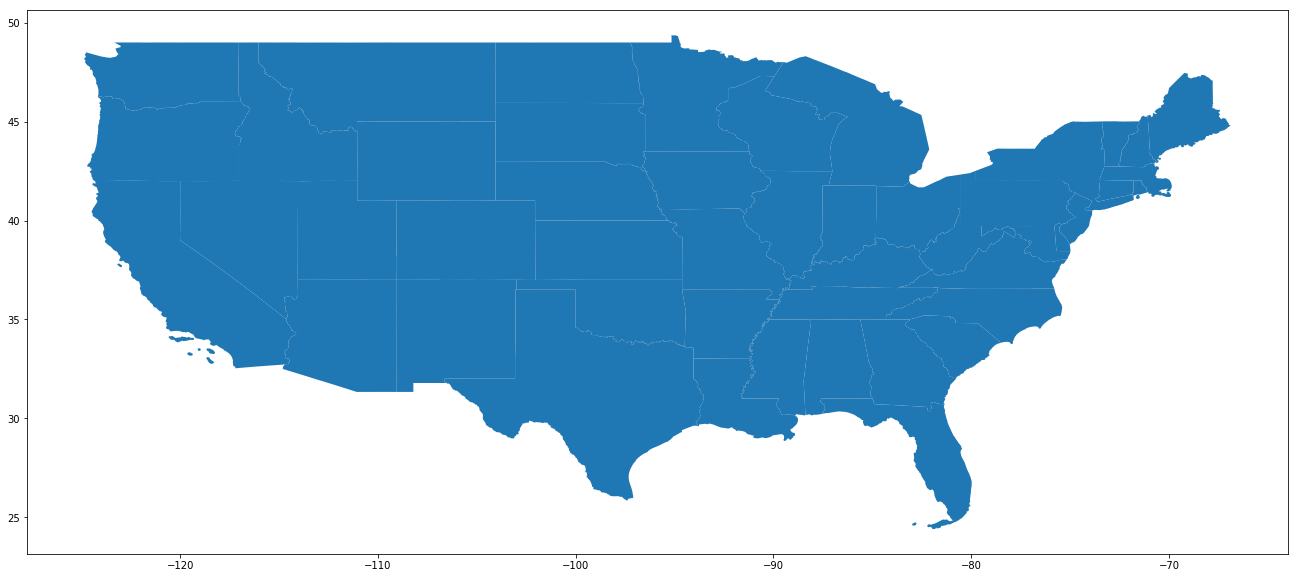

In [47]:
plot_size = (25,10)
data.plot(figsize=plot_size)

### Manipulating Data

Here we create a new row of the attribute table called `color` that is populated with the habitants per square kilometer. This value is then normalized to be plotted.

In [48]:
pop_dens_list = list()

for idx, row in data.iterrows():
    people_per_square_mile = row['DP0010001'] / (row['ALAND10'] / 1000)
    pop_dens_list.append(people_per_square_mile)

In [49]:
data['POPSQKM'] = pop_dens_list

Matplotlib supports different colormaps, which can be found [here](https://matplotlib.org/examples/color/colormaps_reference.html).

The one below is an example of the possible colormaps that can be fed into `cmap`.

![colormaps](https://matplotlib.org/mpl_examples/color/colormaps_reference_02.png)

And finally, we add a color bar to the map.

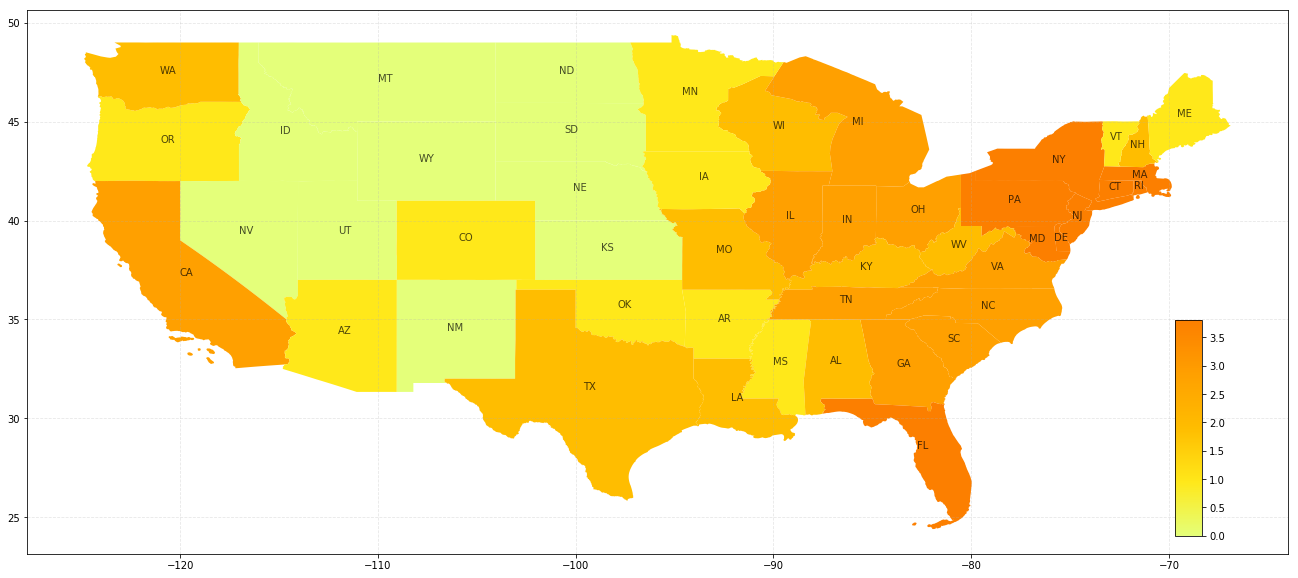

In [50]:
vmin, vmax = round(min(pop_dens_list),2), round(max(pop_dens_list),2)

# plot the graph
ax = data.plot(column='POPSQKM', cmap='Wistia', scheme='quantiles', figsize=(plot_size))

# put labels on center of states
for idx, row in data.iterrows():
    if row['STUSPS10'] != 'DC':
        plt.annotate(s=row['STUSPS10'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), 
                 horizontalalignment='center', alpha=0.7)
    
# add colorbar
fig = ax.get_figure()
cax = fig.add_axes([0.8, 0.15, 0.015, 0.3])
sm = plt.cm.ScalarMappable(cmap='Wistia', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax)

# add latitude and longitude lines
ax.grid('on', which='major', axis='x', linestyle='dashed', alpha=0.3)
ax.grid('on', which='major', axis='y', linestyle='dashed', alpha=0.3)